In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


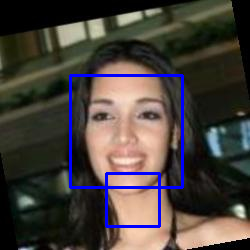

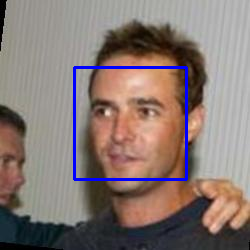

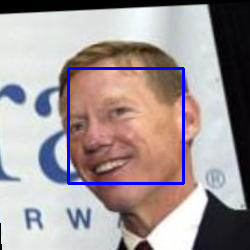

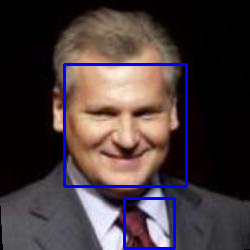

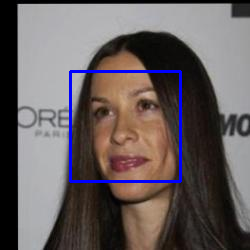

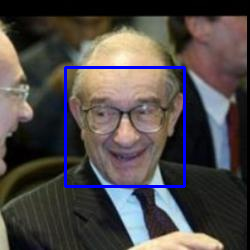

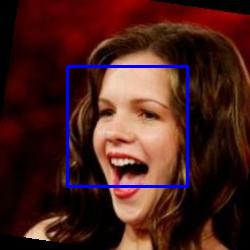

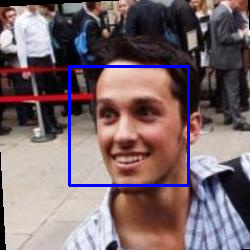

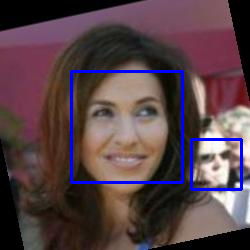

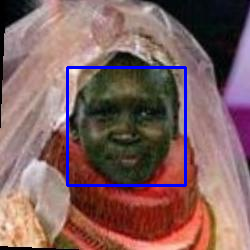

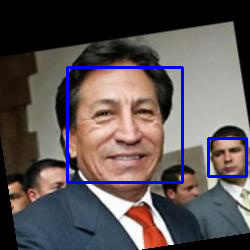

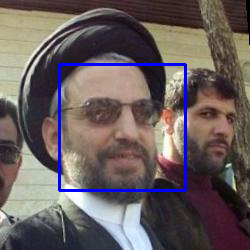

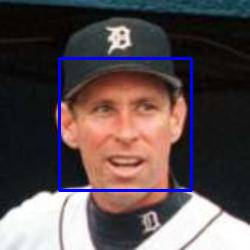

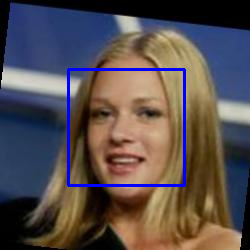

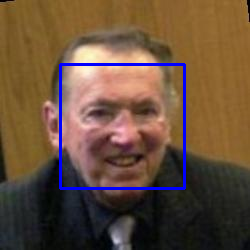

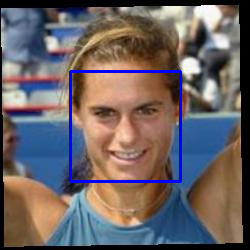

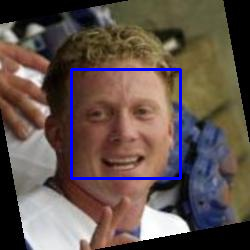

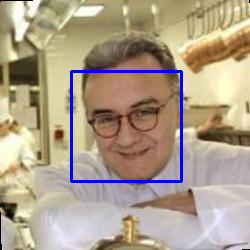

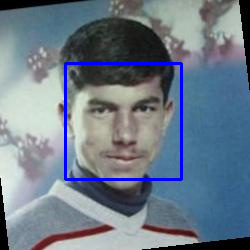

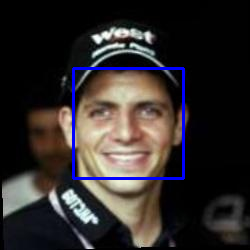

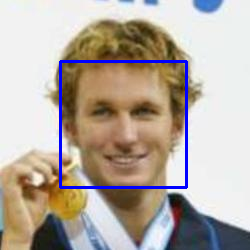

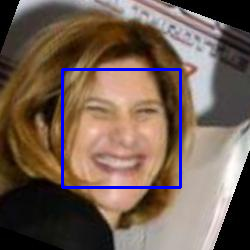

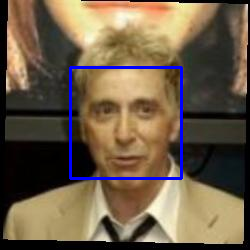

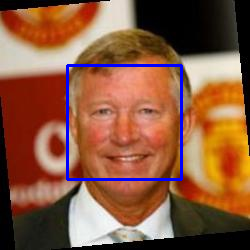

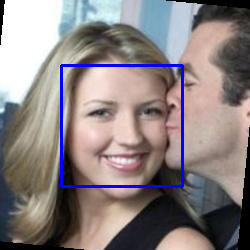

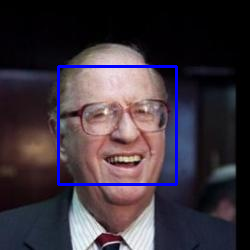

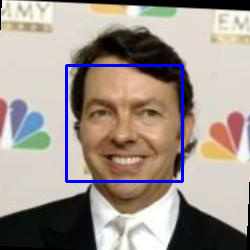

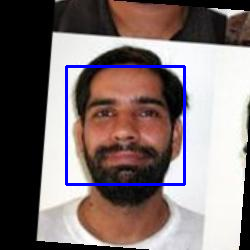

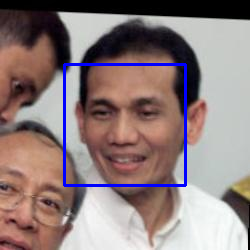

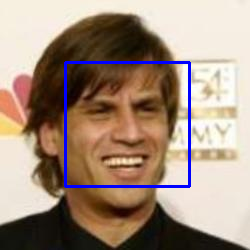

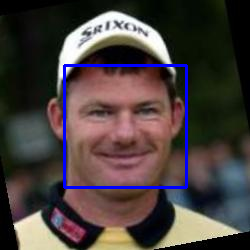

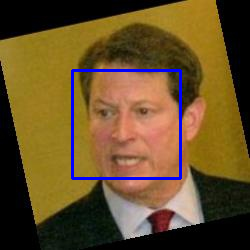

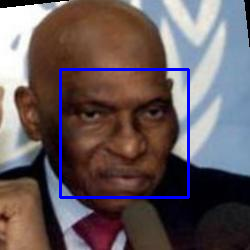

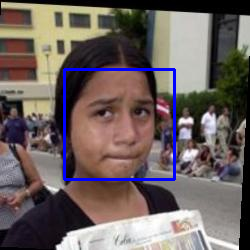

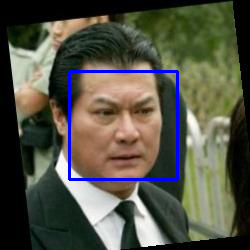

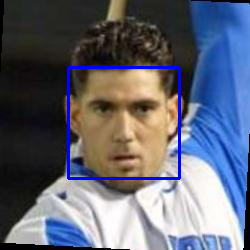

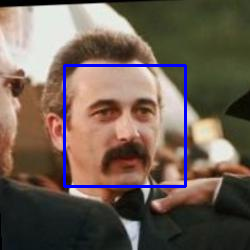

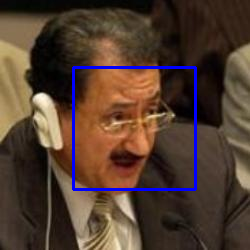

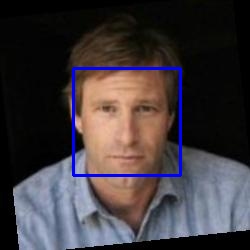

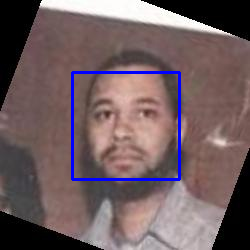

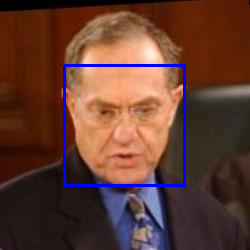

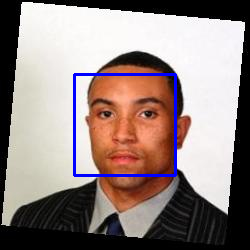

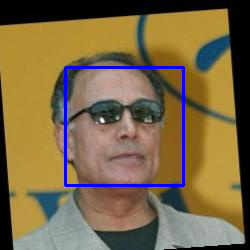

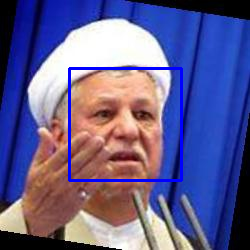

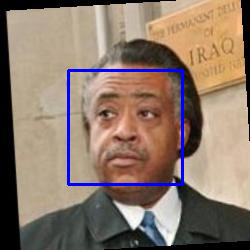

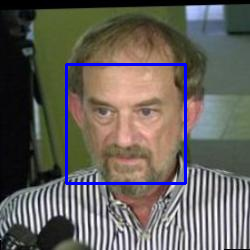

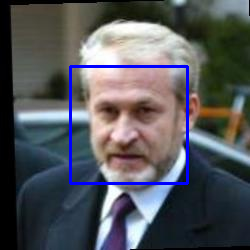

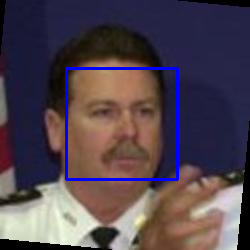

In [ ]:
import torch
import numpy as np
import cv2
import os
import glob

class PreProcessor():
  def __init__(self):
    self.image_path = "/content/drive/MyDrive/age-recognition/dataset/train"
    self.haarcasacde_path = "/content/drive/MyDrive/age-recognition/haarcascade_frontalface_default.xml"
    self.image_paths = glob.glob(os.path.join(self.image_path, "*.jpg"))
    self.output_dir = "/content/drive/MyDrive/age-recognition/dataset/faces"
    self.image_tensor = []

  def getImage(self):
    for idx, img_path in enumerate(self.image_paths):
      image = cv2.imread(img_path) # cv2 출력물 : numpy array, image_size = 250 250 3
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      face_cascade = cv2.CascadeClassifier(self.haarcasacde_path)
      faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20)) # face 위치를 배열에 넣음

      # draw face part on raw image
      for (x, y, w, h) in faces:
          cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

      # show face detected image with PIL
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      pil_image = Image.fromarray(image_rgb)
      display(pil_image)

      # img2tensor
      for face_idx, (x, y, w, h) in enumerate(faces):
        face_img = image[y:y+h, x:x+w] # face_img cv2 출력물 : numpy array, image size = w h 3
        face_img_tensor = torch.from_numpy(face_img)
        self.image_tensor.append(face_img_tensor)
        # base_name = os.path.splitext(os.path.basename(img_path))[0] # 파일 이름 가져오기
        # output_path = os.path.join(self.output_dir, f"{base_name}_face{face_idx}.jpg") # 파일 이름으로 새로운 파일 이름 생성
        # cv2.imwrite(output_path, face_img)


gg = PreProcessor()
gg.getImage()


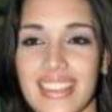

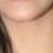

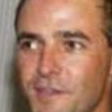

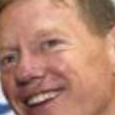

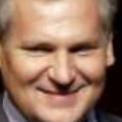

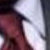

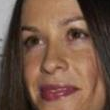

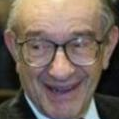

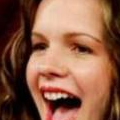

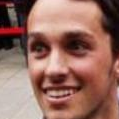

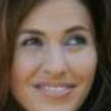

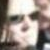

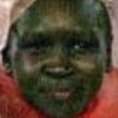

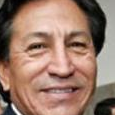

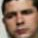

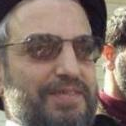

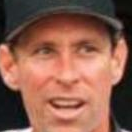

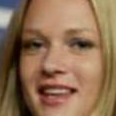

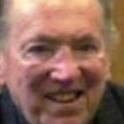

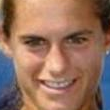

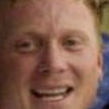

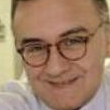

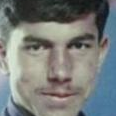

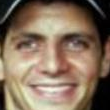

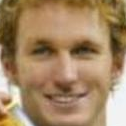

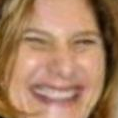

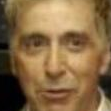

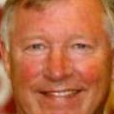

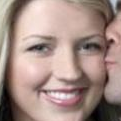

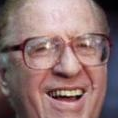

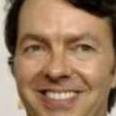

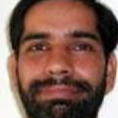

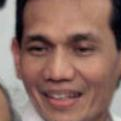

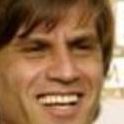

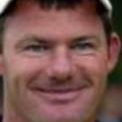

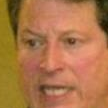

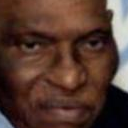

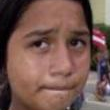

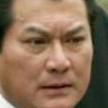

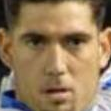

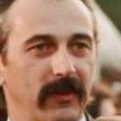

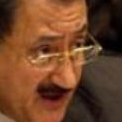

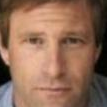

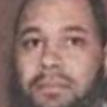

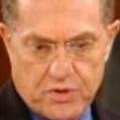

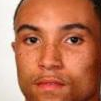

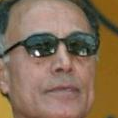

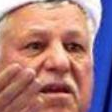

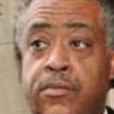

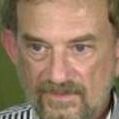

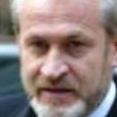

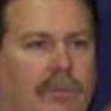

In [ ]:
# 새로운 코드 블록

from IPython.display import display
import torch
from PIL import Image
import numpy as np

# gg.image_tensor에 저장된 얼굴 이미지 텐서를 보여줍니다.
for face_tensor in gg.image_tensor:
  # 텐서를 NumPy 배열로 변환
  # PyTorch 텐서가 GPU에 있다면 .cpu()를 먼저 호출해야 합니다.
  face_img_np = face_tensor.cpu().numpy()

  # NumPy 배열을 PIL Image 객체로 변환
  # 텐서의 채널 순서가 BGR (OpenCV 기본)이 아니라 RGB일 수 있으므로 확인이 필요합니다.
  # 만약 채널 순서가 BGR이라면 RGB로 변환합니다.
  if face_img_np.shape[-1] == 3: # 컬러 이미지인 경우
      face_img_np = cv2.cvtColor(face_img_np, cv2.COLOR_BGR2RGB)

  face_img_pil = Image.fromarray(face_img_np.astype(np.uint8)) # PIL은 uint8 형식을 기대합니다.

  # PIL Image를 표시
  display(face_img_pil)